In [2]:
import pandas as pd
import numpy as  np
import lightgbm as lgb
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score

from sklearn import preprocessing
from sklearn.metrics import *
from lightgbm import LGBMClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import seaborn as sns
from scipy.optimize import minimize

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
emg_1112 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks (1)/소방인력 예측/dataSet/emg_with_code_1112.csv',encoding='EUC-KR')
emg_1314 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks (1)/소방인력 예측/dataSet/emg_with_code_1314.csv',encoding='EUC-KR')
emg_1516 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks (1)/소방인력 예측/dataSet/emg_with_code_1516.csv',encoding='EUC-KR')
emg_1718 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks (1)/소방인력 예측/dataSet/emg_with_code_1718.csv',encoding='EUC-KR')
emg_1920 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks (1)/소방인력 예측/dataSet/emg_with_code_1920.csv',encoding='EUC-KR')

emg_list = [emg_1112,emg_1314,emg_1516,emg_1718,emg_1920]

<ipython-input-3-e9313ee6aadb>:1: DtypeWarning: Columns (5,13,23,107) have mixed types. Specify dtype option on import or set low_memory=False.
  emg_1112 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks (1)/소방인력 예측/dataSet/emg_with_code_1112.csv',encoding='EUC-KR')
<ipython-input-3-e9313ee6aadb>:2: DtypeWarning: Columns (107) have mixed types. Specify dtype option on import or set low_memory=False.
  emg_1314 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks (1)/소방인력 예측/dataSet/emg_with_code_1314.csv',encoding='EUC-KR')
<ipython-input-3-e9313ee6aadb>:3: DtypeWarning: Columns (13,107) have mixed types. Specify dtype option on import or set low_memory=False.
  emg_1516 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks (1)/소방인력 예측/dataSet/emg_with_code_1516.csv',encoding='EUC-KR')
<ipython-input-3-e9313ee6aadb>:4: DtypeWarning: Columns (13,16,101,107) have mixed types. Specify dtype option on import or set low_memory=False.
  emg_1718 = pd.read_

In [4]:
firestation_latlong = pd.read_csv('/content/drive/MyDrive/Colab Notebooks (1)/소방인력 예측/dataSet/geopy_address.csv',encoding='EUC-KR')


firestation_latlong

,시군명,소방서명,도로명주소,지번주소,소방서_도로명,소방서_지번주소,위도,경도
0,전주시,전북소방본부,전주시 완산구 효자로 225,전주시 완산구 효자동3가 1,효자로 225,효자동3가 1,35.8204,127.1087
1,전주시,전주덕진소방서,전주시 덕진구 백제대로 611,전주시 덕진구 금암동 1548-11,백제대로 611,금암동 1548-11,35.8422,127.1364
2,전주시,전주덕진119구조대,전주시 덕진구 백제대로 611,전주시 덕진구 금암동 1548-11,백제대로 611,금암동 1548-11,35.8422,127.1364
3,전주시,금암119안전센터,전주시 덕진구 백제대로 611,전주시 덕진구 금암동 1548-11,백제대로 611,금암동 1548-11,35.8204,127.1087
4,전주시,아중119안전센터,전주시 덕진구 진버들4길 16,전주시 덕진구 인후동1가 807-9,진버들4길 16,인후동1가 807-9,35.8360,127.1638
...,...,...,...,...,...,...,...,...
114,진안군,주천119지역대,진안군 주천면 동상주천로 2213,진안군 주천면 주양리 437-10,동상주천로 2213,주양리 437-10,35.9808,127.3938
115,무주군,무주119안전센터,무주군 무주읍 당산강변로 126,무주군 무주읍 당산리 1765-22,당산강변로 126,당산리 1765-22,36.0047,127.6614
116,무주군,안성119지역대,무주군 안성면 단지봉길 13,무주군 안성면 장기리 1554-3,단지봉길 13,장기리 1554-3,35.8573,127.6532
117,무주군,구천동119지역대,무주군 설천면 구천동1로 54,무주군 설천면 삼공리 418,구천동1로 54,삼공리 418,35.9031,127.7768


In [5]:

firestation_latlong.rename(columns = {'위도':'lat', '경도':'long'},inplace=True)

firestation_latlong

,시군명,소방서명,도로명주소,지번주소,소방서_도로명,소방서_지번주소,lat,long
0,전주시,전북소방본부,전주시 완산구 효자로 225,전주시 완산구 효자동3가 1,효자로 225,효자동3가 1,35.8204,127.1087
1,전주시,전주덕진소방서,전주시 덕진구 백제대로 611,전주시 덕진구 금암동 1548-11,백제대로 611,금암동 1548-11,35.8422,127.1364
2,전주시,전주덕진119구조대,전주시 덕진구 백제대로 611,전주시 덕진구 금암동 1548-11,백제대로 611,금암동 1548-11,35.8422,127.1364
3,전주시,금암119안전센터,전주시 덕진구 백제대로 611,전주시 덕진구 금암동 1548-11,백제대로 611,금암동 1548-11,35.8204,127.1087
4,전주시,아중119안전센터,전주시 덕진구 진버들4길 16,전주시 덕진구 인후동1가 807-9,진버들4길 16,인후동1가 807-9,35.8360,127.1638
...,...,...,...,...,...,...,...,...
114,진안군,주천119지역대,진안군 주천면 동상주천로 2213,진안군 주천면 주양리 437-10,동상주천로 2213,주양리 437-10,35.9808,127.3938
115,무주군,무주119안전센터,무주군 무주읍 당산강변로 126,무주군 무주읍 당산리 1765-22,당산강변로 126,당산리 1765-22,36.0047,127.6614
116,무주군,안성119지역대,무주군 안성면 단지봉길 13,무주군 안성면 장기리 1554-3,단지봉길 13,장기리 1554-3,35.8573,127.6532
117,무주군,구천동119지역대,무주군 설천면 구천동1로 54,무주군 설천면 삼공리 418,구천동1로 54,삼공리 418,35.9031,127.7768


In [6]:

firestation_latlong = firestation_latlong.drop(['시군명','도로명주소','지번주소','소방서_도로명','소방서_지번주소'], axis=1)
firestation_latlong

,소방서명,lat,long
0,전북소방본부,35.8204,127.1087
1,전주덕진소방서,35.8422,127.1364
2,전주덕진119구조대,35.8422,127.1364
3,금암119안전센터,35.8204,127.1087
4,아중119안전센터,35.8360,127.1638
...,...,...,...
114,주천119지역대,35.9808,127.3938
115,무주119안전센터,36.0047,127.6614
116,안성119지역대,35.8573,127.6532
117,구천동119지역대,35.9031,127.7768


In [7]:
for i in range(5):
    emg_list[i] = pd.merge(emg_list[i],firestation_latlong,left_on='ward_nm',right_on='소방서명')

emg_list[0]

,fid,relif_reprt_no,reg_cmptn_se_nm,patnt_ocrn_type_se_nm,patnt_symptms_se_nm1,mjrtrma_nm,hrtarst_nm,crdvsc_crvsscr_se_nm,trnsport_acdnt_nm,trnsport_acdnt_etc_nm,...,time_unit_rainqty,time_unit_ws,time_unit_wd,time_unit_humidity,time_unit_msnf,ADM_CD,TOT_REG_CD,소방서명,lat,long
0,1,20114502103M00041,등록완료,질병외,기타통증,NaN,NaN,NaN,보행자,NaN,...,NaN,1.4,250.0,51.0,NaN,35011600.0,3.501160e+13,교동119안전센터,35.8112,127.1518
1,3,20114502103M00127,등록완료,질병외,기타,NaN,NaN,NaN,NaN,NaN,...,NaN,2.3,250.0,55.0,NaN,35011600.0,3.501160e+13,교동119안전센터,35.8112,127.1518
2,4,20114502103M00220,등록완료,질병외,기타,NaN,NaN,NaN,NaN,NaN,...,NaN,0.8,160.0,85.0,NaN,35011600.0,3.501160e+13,교동119안전센터,35.8112,127.1518
3,5,20114502103M00221,등록완료,질병외,기타통증,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,89.0,NaN,35011600.0,3.501160e+13,교동119안전센터,35.8112,127.1518
4,6,20114502103M00292,등록완료,질병,배뇨장애,NaN,NaN,NaN,NaN,NaN,...,NaN,1.1,160.0,84.0,NaN,35011600.0,3.501160e+13,교동119안전센터,35.8112,127.1518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170072,192896,20124510102M00463,등록완료,질병외,기타,NaN,NaN,NaN,오토바이사고,NaN,...,NaN,2.6,160.0,54.0,NaN,NaN,NaN,장수119안전센터,35.6500,127.5210
170073,192932,20124510102M00690,등록완료,질병,복통,NaN,NaN,NaN,NaN,NaN,...,2.0,1.9,160.0,84.0,NaN,NaN,NaN,장수119안전센터,35.6500,127.5210
170074,192933,20124510102M00698,등록완료,질병외,의식장애,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,50.0,93.0,NaN,NaN,NaN,장수119안전센터,35.6500,127.5210
170075,192985,20124510102M01009,등록완료,질병,기타통증,NaN,NaN,NaN,NaN,NaN,...,NaN,2.0,360.0,35.0,NaN,NaN,NaN,장수119안전센터,35.6500,127.5210


In [8]:
null_list = emg_list[0][emg_list[0]['lat']==0]
null_list['ward_nm']

Series([], Name: ward_nm, dtype: object)

In [9]:
# emg_list[0].to_csv('./emg_data/emg_1112.csv',index=True,encoding='EUC-KR')

# emg_list[1].to_csv('./emg_data/emg_1314.csv',index=True,encoding='EUC-KR')

# emg_list[2].to_csv('./emg_data/emg_1516.csv',index=True,encoding='EUC-KR')

# emg_list[3].to_csv('./emg_data/emg_1718.csv',index=True,encoding='EUC-KR')

# emg_list[4].to_csv('./emg_data/emg_1920.csv',index=True,encoding='EUC-KR')
################

In [10]:
emd_end_11_12=pd.read_csv('/content/drive/MyDrive/Colab Notebooks (1)/소방인력 예측/dataSet/찐마지막데이터_1112.csv',encoding='EUC-KR')

<ipython-input-10-8c88deb4b01a>:1: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  emd_end_11_12=pd.read_csv('/content/drive/MyDrive/Colab Notebooks (1)/소방인력 예측/dataSet/찐마지막데이터_1112.csv',encoding='EUC-KR')


In [11]:
emd_end_11_12.columns
set1 = set(['Unnamed: 0', 'frstt_nm', 'ward_nm', 'dclr_tm', 'daywk', 'dsp_tm', 'spt_dist',
       'patnt_contact_tm', 'sido_nm', 'sigungu_nm', 'emd_nm', 'loc_info_x', 'loc_info_y',
       'spt_dist1', 'time_unit_tmprt', 'ADM_CD', 'TOT_REG_CD', 'frstt_nm', 'lat', 'long',
       'Unnamed: 20','dclr_yr'])
len(set1)

21

In [12]:
len(emg_list[0].columns)

121

In [13]:
set2 = emg_list[1].columns
len(set1)

21

In [14]:
emg_list[0]['dclr_yr']

0         2011
1         2011
2         2011
3         2011
4         2011
          ... 
170072    2012
170073    2012
170074    2012
170075    2012
170076    2012
Name: dclr_yr, Length: 170077, dtype: int64

In [15]:
# label = df_x.loc[:,'dsp_reqre_time']
# df_x=df_x.drop('dsp_reqre_time',axis = 1)

In [16]:
set1 = list(set1)
set2 = list(set2)
for i in set1:
    if i in set2:
        set2.remove(i)

In [17]:
len(set2)

102

In [18]:
for i in range(5):
    emg_list[i]=emg_list[i].drop(set2,axis=1)

In [19]:
emg_list[0].columns

Index(['frstt_nm', 'ward_nm', 'dclr_tm', 'dclr_yr', 'daywk', 'dsp_tm',
       'patnt_contact_tm', 'spt_dist', 'sido_nm', 'sigungu_nm', 'emd_nm',
       'loc_info_x', 'loc_info_y', 'spt_dist1', 'time_unit_tmprt', 'ADM_CD',
       'TOT_REG_CD', 'lat', 'long'],
      dtype='object')

In [20]:
set1

['patnt_contact_tm',
 'ADM_CD',
 'frstt_nm',
 'spt_dist1',
 'daywk',
 'lat',
 'long',
 'Unnamed: 20',
 'loc_info_x',
 'TOT_REG_CD',
 'sido_nm',
 'ward_nm',
 'dclr_yr',
 'Unnamed: 0',
 'emd_nm',
 'spt_dist',
 'sigungu_nm',
 'loc_info_y',
 'dclr_tm',
 'dsp_tm',
 'time_unit_tmprt']

In [21]:
x=emg_list[0].dropna(axis=0)
x.info(), x.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107645 entries, 0 to 170063
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   frstt_nm          107645 non-null  object 
 1   ward_nm           107645 non-null  object 
 2   dclr_tm           107645 non-null  int64  
 3   dclr_yr           107645 non-null  int64  
 4   daywk             107645 non-null  object 
 5   dsp_tm            107645 non-null  int64  
 6   patnt_contact_tm  107645 non-null  float64
 7   spt_dist          107645 non-null  float64
 8   sido_nm           107645 non-null  object 
 9   sigungu_nm        107645 non-null  object 
 10  emd_nm            107645 non-null  object 
 11  loc_info_x        107645 non-null  float64
 12  loc_info_y        107645 non-null  float64
 13  spt_dist1         107645 non-null  float64
 14  time_unit_tmprt   107645 non-null  float64
 15  ADM_CD            107645 non-null  float64
 16  TOT_REG_CD        10

(None,
   frstt_nm    ward_nm  dclr_tm  dclr_yr daywk  dsp_tm  patnt_contact_tm  \
 0  전주완산소방서  교동119안전센터   182700     2011   금요일  182700          183500.0   
 1  전주완산소방서  교동119안전센터   192700     2011   목요일  192700          193200.0   
 2  전주완산소방서  교동119안전센터   220600     2011   금요일  220600          220900.0   
 3  전주완산소방서  교동119안전센터     5900     2011   토요일   10200           10500.0   
 4  전주완산소방서  교동119안전센터    45000     2011   수요일   45100           45400.0   
 
    spt_dist sido_nm sigungu_nm emd_nm   loc_info_x   loc_info_y  spt_dist1  \
 0       2.0    전라북도     전주시완산구   동서학동  214611.5781  256851.3906        2.0   
 1       1.0    전라북도     전주시완산구   동서학동  214331.8906  256869.4844        5.0   
 2       2.0    전라북도     전주시완산구   동서학동  214331.8906  256869.4844        2.0   
 3       2.0    전라북도     전주시완산구   동서학동  214379.9531  256709.0469        3.0   
 4       2.0    전라북도     전주시완산구   동서학동  214457.1875  256820.5000        4.0   
 
    time_unit_tmprt      ADM_CD    TOT_REG_CD      lat     

In [22]:
for i in range(5):
  # emg_list[i]["dsp_reqre_time"] = emg_list[i]["patnt_contact_tm"]-emg_list[i]["dsp_tm"]
  sub = emg_list[i]["patnt_contact_tm"]-emg_list[i]["dsp_tm"]
  emg_list[i].loc[sub>0,"dsp_reqre_time"] =  emg_list[i]["patnt_contact_tm"]-emg_list[i]["dsp_tm"]
  emg_list[i].loc[sub<0,"dsp_reqre_time"] = (236000-emg_list[i]["dsp_tm"])+emg_list[i]["patnt_contact_tm"]


In [23]:
set(emg_list[0].loc[:,'ward_nm'])&set(emg_list[1].loc[:,'ward_nm'])&set(emg_list[2].loc[:,'ward_nm'])&set(emg_list[3].loc[:,'ward_nm'])&set(emg_list[4].loc[:,'ward_nm'])

{'격포119안전센터',
 '경암119안전센터',
 '고창119안전센터',
 '공단119안전센터',
 '교동119안전센터',
 '금동119안전센터',
 '금마119안전센터',
 '금산119안전센터',
 '금암119안전센터',
 '금지119안전센터',
 '남중119안전센터',
 '노송119안전센터',
 '대산119안전센터',
 '대야119안전센터',
 '마령119안전센터',
 '만경119안전센터',
 '모현119안전센터',
 '무장119안전센터',
 '무주119안전센터',
 '부안119안전센터',
 '사정119안전센터',
 '시기119안전센터',
 '식정119안전센터',
 '신태인119안전센터',
 '아중119안전센터',
 '영원119안전센터',
 '인화119안전센터',
 '임실119안전센터',
 '장계119안전센터',
 '장수119안전센터',
 '전미119안전센터',
 '지곡119안전센터',
 '진안119안전센터',
 '팔복119안전센터',
 '팔봉119안전센터',
 '평화119안전센터',
 '하북119안전센터',
 '함열119안전센터',
 '항만119안전센터',
 '효자119안전센터',
 '흥덕119안전센터'}

In [24]:
for i in range(5):
    emg_list[i] = emg_list[i].dropna(axis=0)

In [25]:
encoding =LabelEncoder()

emg_list[0].head()

,frstt_nm,ward_nm,dclr_tm,dclr_yr,daywk,dsp_tm,patnt_contact_tm,spt_dist,sido_nm,sigungu_nm,emd_nm,loc_info_x,loc_info_y,spt_dist1,time_unit_tmprt,ADM_CD,TOT_REG_CD,lat,long,dsp_reqre_time
0,전주완산소방서,교동119안전센터,182700,2011,금요일,182700,183500.0,2.0,전라북도,전주시완산구,동서학동,214611.5781,256851.3906,2.0,-3.0,35011600.0,3.501160e+13,35.8112,127.1518,800.0
1,전주완산소방서,교동119안전센터,192700,2011,목요일,192700,193200.0,1.0,전라북도,전주시완산구,동서학동,214331.8906,256869.4844,5.0,-4.1,35011600.0,3.501160e+13,35.8112,127.1518,500.0
2,전주완산소방서,교동119안전센터,220600,2011,금요일,220600,220900.0,2.0,전라북도,전주시완산구,동서학동,214331.8906,256869.4844,2.0,-0.2,35011600.0,3.501160e+13,35.8112,127.1518,300.0
3,전주완산소방서,교동119안전센터,5900,2011,토요일,10200,10500.0,2.0,전라북도,전주시완산구,동서학동,214379.9531,256709.0469,3.0,-1.5,35011600.0,3.501160e+13,35.8112,127.1518,300.0
4,전주완산소방서,교동119안전센터,45000,2011,수요일,45100,45400.0,2.0,전라북도,전주시완산구,동서학동,214457.1875,256820.5000,4.0,-5.7,35011600.0,3.501160e+13,35.8112,127.1518,300.0


In [26]:
emg_list[1]

,frstt_nm,ward_nm,dclr_tm,dclr_yr,daywk,dsp_tm,patnt_contact_tm,spt_dist,sido_nm,sigungu_nm,emd_nm,loc_info_x,loc_info_y,spt_dist1,time_unit_tmprt,ADM_CD,TOT_REG_CD,lat,long,dsp_reqre_time
2,전주완산소방서,교동119안전센터,31500,2013,수요일,31700,32000.0,2.0,전라북도,전주시완산구,동서학동,214328.7344,256870.7969,1.0,-5.0,35011600.0,3.501160e+13,35.8112,127.1518,300.0
3,전주완산소방서,교동119안전센터,174100,2013,일요일,174200,174600.0,1.0,전라북도,전주시완산구,동서학동,214328.7344,256870.7969,3.0,7.3,35011600.0,3.501160e+13,35.8112,127.1518,400.0
7,전주완산소방서,교동119안전센터,81200,2013,목요일,81300,81600.0,1.0,전라북도,전주시완산구,동서학동,214611.5781,256851.3906,3.0,1.8,35011600.0,3.501160e+13,35.8112,127.1518,300.0
9,전주완산소방서,교동119안전센터,32000,2013,일요일,32200,32500.0,2.0,전라북도,전주시완산구,동서학동,214448.2031,256732.4844,5.0,4.3,35011600.0,3.501160e+13,35.8112,127.1518,300.0
10,전주완산소방서,교동119안전센터,203100,2013,화요일,203200,203400.0,1.0,전라북도,전주시완산구,동서학동,214328.7344,256870.7969,3.0,6.5,35011600.0,3.501160e+13,35.8112,127.1518,200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183998,고창소방서,무장119안전센터,95900,2014,일요일,102900,103300.0,4.0,전라북도,고창군,부안면,170568.0805,224156.8890,12.0,19.9,35570430.0,3.557043e+13,35.4200,126.5585,400.0
184001,고창소방서,무장119안전센터,5300,2014,화요일,5600,12000.0,20.0,전라북도,고창군,부안면,165782.9400,228141.7700,26.0,21.6,35570430.0,3.557043e+13,35.4200,126.5585,6400.0
184002,고창소방서,무장119안전센터,104100,2013,목요일,104200,110200.0,19.0,전라북도,고창군,부안면,170321.6875,221981.0156,8.0,24.8,35570430.0,3.557043e+13,35.4200,126.5585,6000.0
184004,고창소방서,무장119안전센터,72400,2013,금요일,72400,74700.0,23.0,전라북도,고창군,부안면,164822.0469,226286.4219,22.0,15.6,35570430.0,3.557043e+13,35.4200,126.5585,2300.0


In [27]:
emg_list[0].loc[:,'frstt_nm']

0         전주완산소방서
1         전주완산소방서
2         전주완산소방서
3         전주완산소방서
4         전주완산소방서
           ...   
170053     무진장소방서
170054     무진장소방서
170060     무진장소방서
170062     무진장소방서
170063     무진장소방서
Name: frstt_nm, Length: 106960, dtype: object

In [28]:
x = pd.concat([i for i in emg_list],axis = 0)

In [29]:
x.shape
print(x)

       frstt_nm    ward_nm  dclr_tm  dclr_yr daywk  dsp_tm  patnt_contact_tm  \
0       전주완산소방서  교동119안전센터   182700     2011   금요일  182700          183500.0   
1       전주완산소방서  교동119안전센터   192700     2011   목요일  192700          193200.0   
2       전주완산소방서  교동119안전센터   220600     2011   금요일  220600          220900.0   
3       전주완산소방서  교동119안전센터     5900     2011   토요일   10200           10500.0   
4       전주완산소방서  교동119안전센터    45000     2011   수요일   45100           45400.0   
...         ...        ...      ...      ...   ...     ...               ...   
242515    고창소방서  대산119안전센터   221700     2020   수요일  223724          230000.0   
242517    고창소방서  대산119안전센터   112400     2020   수요일  115058          122700.0   
242518    고창소방서  대산119안전센터   112400     2020   수요일  115058          122800.0   
242519    고창소방서  대산119안전센터   112400     2020   수요일  115058          122900.0   
242522    고창소방서  대산119안전센터   142500     2019   월요일  142931          144700.0   

        spt_dist sido_nm sigungu_nm emd

In [30]:
x

,frstt_nm,ward_nm,dclr_tm,dclr_yr,daywk,dsp_tm,patnt_contact_tm,spt_dist,sido_nm,sigungu_nm,emd_nm,loc_info_x,loc_info_y,spt_dist1,time_unit_tmprt,ADM_CD,TOT_REG_CD,lat,long,dsp_reqre_time
0,전주완산소방서,교동119안전센터,182700,2011,금요일,182700,183500.0,2.0,전라북도,전주시완산구,동서학동,214611.5781,256851.3906,2.0,-3.0,35011600.0,3.501160e+13,35.8112,127.1518,800.0
1,전주완산소방서,교동119안전센터,192700,2011,목요일,192700,193200.0,1.0,전라북도,전주시완산구,동서학동,214331.8906,256869.4844,5.0,-4.1,35011600.0,3.501160e+13,35.8112,127.1518,500.0
2,전주완산소방서,교동119안전센터,220600,2011,금요일,220600,220900.0,2.0,전라북도,전주시완산구,동서학동,214331.8906,256869.4844,2.0,-0.2,35011600.0,3.501160e+13,35.8112,127.1518,300.0
3,전주완산소방서,교동119안전센터,5900,2011,토요일,10200,10500.0,2.0,전라북도,전주시완산구,동서학동,214379.9531,256709.0469,3.0,-1.5,35011600.0,3.501160e+13,35.8112,127.1518,300.0
4,전주완산소방서,교동119안전센터,45000,2011,수요일,45100,45400.0,2.0,전라북도,전주시완산구,동서학동,214457.1875,256820.5000,4.0,-5.7,35011600.0,3.501160e+13,35.8112,127.1518,300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242515,고창소방서,대산119안전센터,221700,2020,수요일,223724,230000.0,21.4,전라북도,고창군,흥덕면,172941.6000,224940.4000,13.0,14.9,35570400.0,3.557040e+13,35.3399,126.5983,6276.0
242517,고창소방서,대산119안전센터,112400,2020,수요일,115058,122700.0,24.4,전라북도,고창군,흥덕면,172034.0700,228093.6000,20.0,-5.4,35570400.0,3.557040e+13,35.3399,126.5983,7642.0
242518,고창소방서,대산119안전센터,112400,2020,수요일,115058,122800.0,24.4,전라북도,고창군,흥덕면,172034.0700,228093.6000,20.0,-5.4,35570400.0,3.557040e+13,35.3399,126.5983,7742.0
242519,고창소방서,대산119안전센터,112400,2020,수요일,115058,122900.0,24.4,전라북도,고창군,흥덕면,172034.0700,228093.6000,20.0,-5.4,35570400.0,3.557040e+13,35.3399,126.5983,7842.0


In [31]:
dictionary=pd.read_csv('/content/drive/MyDrive/Colab Notebooks (1)/소방인력 예측/dataSet/dictionary_2.csv',encoding = 'EUC-KR')

In [32]:
dictionary=dictionary.rename(columns = {'Unnamed: 0':'ward_nm'})

In [33]:
x_merge = pd.merge(x, dictionary, on = ['ward_nm'],how = 'right')
x_merge

,frstt_nm,ward_nm,dclr_tm,dclr_yr,daywk,dsp_tm,patnt_contact_tm,spt_dist,sido_nm,sigungu_nm,...,spt_dist1,time_unit_tmprt,ADM_CD,TOT_REG_CD,lat,long,dsp_reqre_time,0,1,2
0,전주완산소방서,교동119안전센터,182700,2011,금요일,182700,183500.0,2.0,전라북도,전주시완산구,...,2.0,-3.0,35011600.0,3.501160e+13,35.8112,127.1518,800.0,5,35.811200,127.15180
1,전주완산소방서,교동119안전센터,192700,2011,목요일,192700,193200.0,1.0,전라북도,전주시완산구,...,5.0,-4.1,35011600.0,3.501160e+13,35.8112,127.1518,500.0,5,35.811200,127.15180
2,전주완산소방서,교동119안전센터,220600,2011,금요일,220600,220900.0,2.0,전라북도,전주시완산구,...,2.0,-0.2,35011600.0,3.501160e+13,35.8112,127.1518,300.0,5,35.811200,127.15180
3,전주완산소방서,교동119안전센터,5900,2011,토요일,10200,10500.0,2.0,전라북도,전주시완산구,...,3.0,-1.5,35011600.0,3.501160e+13,35.8112,127.1518,300.0,5,35.811200,127.15180
4,전주완산소방서,교동119안전센터,45000,2011,수요일,45100,45400.0,2.0,전라북도,전주시완산구,...,4.0,-5.7,35011600.0,3.501160e+13,35.8112,127.1518,300.0,5,35.811200,127.15180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551106,완주소방서,고산119안전센터,121400,2019,토요일,121505,121700.0,1.0,전라북도,익산시,...,2.5,28.7,35030650.0,3.503065e+13,35.9743,127.2170,195.0,2,35.975906,127.20259
551107,완주소방서,고산119안전센터,151000,2020,화요일,151719,155900.0,18.0,전라북도,익산시,...,85.0,6.1,35030690.0,3.503069e+13,35.9743,127.2170,4181.0,2,35.975906,127.20259
551108,완주소방서,고산119안전센터,163000,2020,월요일,163427,165000.0,10.0,전라북도,익산시,...,3.0,19.0,35510130.0,3.551013e+13,35.9743,127.2170,1573.0,2,35.975906,127.20259
551109,완주소방서,고산119안전센터,114000,2020,목요일,122032,130100.0,32.0,전라북도,전주시완산구,...,60.0,-0.6,35510390.0,3.551039e+13,35.9743,127.2170,8068.0,2,35.975906,127.20259


In [34]:
x_merge=x_merge.drop(['lat','long','0'], axis = 1)
x_merge=x_merge.rename(columns = {'1':'lat', '2':'long'})

In [35]:
x = x_merge.copy()

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
i = 'frstt_nm'
x.iloc[0,0]

'전주완산소방서'

In [38]:
x.columns[1]

'ward_nm'

In [39]:
i = 0
x.columns[0]

'frstt_nm'

In [40]:
x_2=x.copy()

In [41]:
for i in range(len(x.columns)):
    if type(x.iloc[0,i]) == str:
        encoding =LabelEncoder()
        x.loc[:,x.columns[i]] = encoding.fit_transform(x.loc[:,x.columns[i]])

<ipython-input-41-3650cd159c21>:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  x.loc[:,x.columns[i]] = encoding.fit_transform(x.loc[:,x.columns[i]])
<ipython-input-41-3650cd159c21>:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  x.loc[:,x.columns[i]] = encoding.fit_transform(x.loc[:,x.columns[i]])
<ipython-input-41-3650cd159c21>:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newv

In [42]:
x

,frstt_nm,ward_nm,dclr_tm,dclr_yr,daywk,dsp_tm,patnt_contact_tm,spt_dist,sido_nm,sigungu_nm,emd_nm,loc_info_x,loc_info_y,spt_dist1,time_unit_tmprt,ADM_CD,TOT_REG_CD,dsp_reqre_time,lat,long
0,10,5,182700,2011,0,182700,183500.0,2.0,1,9,79,214611.5781,256851.3906,2.0,-3.0,35011600.0,3.501160e+13,800.0,35.811200,127.15180
1,10,5,192700,2011,1,192700,193200.0,1.0,1,9,79,214331.8906,256869.4844,5.0,-4.1,35011600.0,3.501160e+13,500.0,35.811200,127.15180
2,10,5,220600,2011,0,220600,220900.0,2.0,1,9,79,214331.8906,256869.4844,2.0,-0.2,35011600.0,3.501160e+13,300.0,35.811200,127.15180
3,10,5,5900,2011,5,10200,10500.0,2.0,1,9,79,214379.9531,256709.0469,3.0,-1.5,35011600.0,3.501160e+13,300.0,35.811200,127.15180
4,10,5,45000,2011,2,45100,45400.0,2.0,1,9,79,214457.1875,256820.5000,4.0,-5.7,35011600.0,3.501160e+13,300.0,35.811200,127.15180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551106,7,2,121400,2019,5,121505,121700.0,1.0,1,5,181,196833.4449,273730.3696,2.5,28.7,35030650.0,3.503065e+13,195.0,35.975906,127.20259
551107,7,2,151000,2020,6,151719,155900.0,18.0,1,5,317,201466.4000,274227.5000,85.0,6.1,35030690.0,3.503069e+13,4181.0,35.975906,127.20259
551108,7,2,163000,2020,3,163427,165000.0,10.0,1,5,221,213811.5000,266351.5000,3.0,19.0,35510130.0,3.551013e+13,1573.0,35.975906,127.20259
551109,7,2,114000,2020,1,122032,130100.0,32.0,1,9,32,218215.3800,279653.5200,60.0,-0.6,35510390.0,3.551039e+13,8068.0,35.975906,127.20259


In [43]:
# x.to_csv('/content/drive/MyDrive/Colab Notebooks (1)/소방인력 예측/dataSet/linear_regression_1')

# regression preprocessing on original data

In [44]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [45]:
x.loc[:,'dclr_yr'] = x.loc[:,'dclr_yr'] - 2000

In [46]:
df_q=pd.read_csv('/content/drive/MyDrive/Colab Notebooks (1)/소방인력 예측/dataSet/train_data.csv', encoding='euc-kr')
df_w=pd.read_csv('/content/drive/MyDrive/Colab Notebooks (1)/소방인력 예측/dataSet/valid_data.csv', encoding='euc-kr')
df_e=pd.read_csv('/content/drive/MyDrive/Colab Notebooks (1)/소방인력 예측/dataSet/test_data.csv', encoding='euc-kr')

In [47]:
df = pd.concat([df_q, df_w, df_e], axis = 0)

In [48]:
df.iloc[0,1]

35011700010002

In [49]:
set(['year', 'code', 'eld_dep_ratio','pop_dens','total_pop','avg_age'])

{'avg_age', 'code', 'eld_dep_ratio', 'pop_dens', 'total_pop', 'year'}

In [50]:
df = df.drop(list(set(df.columns) -set(['year', 'code', 'eld_dep_ratio','pop_dens','total_pop','avg_age'])),axis = 1)

In [51]:
x = x.rename(columns ={'TOT_REG_CD': 'code', 'dclr_yr':'year'})
df_x = pd.merge(x, df, on = ['code', 'year'], how ='right')

In [52]:
df_x = df_x.dropna(axis = 0)
df_x.shape

(2060768, 24)

In [53]:
df_x

,frstt_nm,ward_nm,dclr_tm,year,daywk,dsp_tm,patnt_contact_tm,spt_dist,sido_nm,sigungu_nm,...,time_unit_tmprt,ADM_CD,code,dsp_reqre_time,lat,long,total_pop,avg_age,pop_dens,eld_dep_ratio
0,10.0,40.0,114300.0,14,4.0,114400.0,114900.0,3.0,1.0,9.0,...,22.9,35011700.0,3.501170e+13,500.0,35.786200,127.133900,419,40.9,17816.2,113.2
1,10.0,45.0,193300.0,14,5.0,193500.0,194300.0,2.0,1.0,9.0,...,16.9,35011700.0,3.501170e+13,800.0,35.799303,127.116509,419,40.9,17816.2,113.2
2,10.0,45.0,91900.0,14,6.0,92000.0,92800.0,2.0,1.0,9.0,...,4.6,35011700.0,3.501170e+13,800.0,35.799303,127.116509,419,40.9,17816.2,113.2
3,10.0,45.0,93600.0,14,2.0,93600.0,94200.0,2.0,1.0,9.0,...,12.8,35011700.0,3.501170e+13,600.0,35.799303,127.116509,419,40.9,17816.2,113.2
4,10.0,45.0,90100.0,14,2.0,90900.0,91200.0,3.0,1.0,9.0,...,23.0,35011700.0,3.501170e+13,300.0,35.799303,127.116509,419,40.9,17816.2,113.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2089170,8.0,4.0,234700.0,14,5.0,234800.0,235500.0,3.0,1.0,5.0,...,24.0,35030700.0,3.503070e+13,700.0,35.947112,126.976939,191,39.1,2641.7,71.1
2089171,8.0,4.0,132600.0,14,2.0,132700.0,133300.0,3.0,1.0,5.0,...,20.4,35030700.0,3.503070e+13,600.0,35.947112,126.976939,191,39.1,2641.7,71.1
2089172,8.0,4.0,70000.0,14,3.0,70000.0,70700.0,2.5,1.0,5.0,...,9.7,35030700.0,3.503070e+13,700.0,35.947112,126.976939,191,39.1,2641.7,71.1
2089173,8.0,4.0,202200.0,14,3.0,202400.0,202600.0,2.0,1.0,5.0,...,0.2,35030700.0,3.503070e+13,200.0,35.947112,126.976939,191,39.1,2641.7,71.1


In [54]:
df_x=df_x.drop(['ADM_CD','code','sido_nm','dclr_tm','patnt_contact_tm','dsp_tm','frstt_nm'], axis = 1)
df_x.loc[:,'dsp_reqre_time']=df_x.loc[:,'dsp_reqre_time']/100


In [55]:
df_x=df_x.drop(['emd_nm','spt_dist1'],axis = 1)

In [56]:
df_x=df_x.drop(df_x.index[-1],axis = 0)

In [57]:
num_rows_to_drop = 2089173//4 * 3
df_x = df_x.drop(df_x.sample(num_rows_to_drop).index)

In [58]:
!pip install pyproj

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 42.9 MB/s eta 0:00:00


In [59]:
from pyproj import Proj, transform

In [60]:
def project_array(coord, p1_type, p2_type):
    """
    좌표계 변환 함수
    - coord: x, y 좌표 정보가 담긴 NumPy Array
    - p1_type: 입력 좌표계 정보 ex) epsg:5179
    - p2_type: 출력 좌표계 정보 ex) epsg:4326
    """
    p1 =Proj(init=p1_type)
    p2 =Proj(init=p2_type)
    fx, fy =transform(p1, p2, coord[:, 0], coord[:, 1])
    return np.dstack([fx, fy])[0]
p1_type = "epsg:2097"
p2_type = "epsg:4326"
x = 1234567
y = 9876543

In [61]:
a1=np.array(df_x.loc[:,'loc_info_x']).reshape(-1,1)
a2=np.array(df_x.loc[:,'loc_info_y']).reshape(-1,1)
b = np.concatenate((a1,a2),axis = 1)

In [62]:
b.shape

(493888, 2)

In [63]:
c = project_array(b, p1_type, p2_type)
print(c)

/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
<ipython-input-60-0da0b04c9342>:10: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  fx, fy =transform(p1, p2, coord[:, 0], coord[:, 1]

[[127.12687837  35.80762575]
 [127.39119188  35.41895224]
 [127.39208661  35.41866019]
 ...
 [126.98515566  35.96183472]
 [126.98513278  35.96054154]
 [126.9869562   35.96191417]]


In [64]:
df_x.loc[:,'loc_info_x'] = c[:,1]
df_x.loc[:,'loc_info_y'] = c[:,0]

In [65]:
df_x

,ward_nm,year,daywk,spt_dist,sigungu_nm,loc_info_x,loc_info_y,time_unit_tmprt,dsp_reqre_time,lat,long,total_pop,avg_age,pop_dens,eld_dep_ratio
2,45.0,14,6.0,2.0,9.0,35.807626,127.126878,4.6,8.00,35.799303,127.116509,419,40.9,17816.2,113.2
8,27.0,15,0.0,3.0,3.0,35.418952,127.391192,8.9,9.00,35.436699,127.417067,602,36.7,48669.0,48.5
10,27.0,15,3.0,4.0,3.0,35.418660,127.392087,25.6,12.00,35.436699,127.417067,602,36.7,48669.0,48.5
11,27.0,15,1.0,9.5,3.0,35.418560,127.392713,19.0,5.00,35.436699,127.417067,602,36.7,48669.0,48.5
15,29.0,18,1.0,4.5,8.0,35.864528,127.149600,6.9,7.55,35.836000,127.163800,282,43.4,354.7,106.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2089151,39.0,14,1.0,3.0,5.0,35.961686,126.987193,26.3,1.00,35.962293,127.005080,191,39.1,2641.7,71.1
2089159,39.0,14,4.0,3.0,5.0,35.960332,126.985496,9.3,5.00,35.962293,127.005080,191,39.1,2641.7,71.1
2089164,39.0,14,1.0,2.0,5.0,35.961835,126.985156,-5.9,7.00,35.962293,127.005080,191,39.1,2641.7,71.1
2089166,4.0,14,2.0,3.0,5.0,35.960542,126.985133,0.6,9.00,35.947112,126.976939,191,39.1,2641.7,71.1


In [66]:
'''
#도착시간 평균
for i in range(10):
  #연도 별 데이터 선택
  x = fire_with_code[fire_with_code['dclr_yr']== (2011 + i)]
  g = x.groupby(['TOT_REG_CD','qu_se'])['dsp_reqre_time'].mean()
  mean_c = g.to_frame()
  mean_c = mean_c.reset_index()
  mean_c = mean_c.rename(columns = {'TOT_REG_CD':'code','dsp_reqre_time':'fire_dsp_reqre_avg_time'})
  code_list[i] = pd.merge(code_list[i],mean_c,on=['code','qu_se'],how='left')

code_list[0]
'''

"\n#도착시간 평균\nfor i in range(10):\n  #연도 별 데이터 선택\n  x = fire_with_code[fire_with_code['dclr_yr']== (2011 + i)] \n  g = x.groupby(['TOT_REG_CD','qu_se'])['dsp_reqre_time'].mean()\n  mean_c = g.to_frame()\n  mean_c = mean_c.reset_index()\n  mean_c = mean_c.rename(columns = {'TOT_REG_CD':'code','dsp_reqre_time':'fire_dsp_reqre_avg_time'})\n  code_list[i] = pd.merge(code_list[i],mean_c,on=['code','qu_se'],how='left')\n\ncode_list[0]\n"

In [67]:
df_x

,ward_nm,year,daywk,spt_dist,sigungu_nm,loc_info_x,loc_info_y,time_unit_tmprt,dsp_reqre_time,lat,long,total_pop,avg_age,pop_dens,eld_dep_ratio
2,45.0,14,6.0,2.0,9.0,35.807626,127.126878,4.6,8.00,35.799303,127.116509,419,40.9,17816.2,113.2
8,27.0,15,0.0,3.0,3.0,35.418952,127.391192,8.9,9.00,35.436699,127.417067,602,36.7,48669.0,48.5
10,27.0,15,3.0,4.0,3.0,35.418660,127.392087,25.6,12.00,35.436699,127.417067,602,36.7,48669.0,48.5
11,27.0,15,1.0,9.5,3.0,35.418560,127.392713,19.0,5.00,35.436699,127.417067,602,36.7,48669.0,48.5
15,29.0,18,1.0,4.5,8.0,35.864528,127.149600,6.9,7.55,35.836000,127.163800,282,43.4,354.7,106.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2089151,39.0,14,1.0,3.0,5.0,35.961686,126.987193,26.3,1.00,35.962293,127.005080,191,39.1,2641.7,71.1
2089159,39.0,14,4.0,3.0,5.0,35.960332,126.985496,9.3,5.00,35.962293,127.005080,191,39.1,2641.7,71.1
2089164,39.0,14,1.0,2.0,5.0,35.961835,126.985156,-5.9,7.00,35.962293,127.005080,191,39.1,2641.7,71.1
2089166,4.0,14,2.0,3.0,5.0,35.960542,126.985133,0.6,9.00,35.947112,126.976939,191,39.1,2641.7,71.1


In [68]:
label = df_x.loc[:,'dsp_reqre_time']
df_x=df_x.drop('dsp_reqre_time',axis = 1)

In [69]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

In [157]:
df_x=df_x.loc[:,['loc_info_x'
,'loc_info_y'
 ,'time_unit_tmprt'
  ,'spt_dist'
  ,'daywk'
,'total_pop'
 ,'avg_age'
 ,'pop_dens'
 ,'eld_dep_ratio']]

In [159]:
for i in df_x.columns:
    scaler = StandardScaler()
    globals()[f"x_{i}"] = scaler.fit_transform(np.array(df_x.loc[:,f'{i}']).reshape(-1,1))
    df_x.loc[:,f'{i}']=np.array(globals()[f"x_{i}"]).reshape(-1,1)

# linear regression

In [161]:
df_x.columns

Index(['loc_info_x', 'loc_info_y', 'time_unit_tmprt', 'spt_dist', 'daywk',
       'total_pop', 'avg_age', 'pop_dens', 'eld_dep_ratio'],
      dtype='object')

In [163]:
train_df, test_df,train_df_label, test_df_label= train_test_split(df_x,label, test_size = 0.1, random_state = 2222)
# train_df_label, test_df_label= train_test_split(label, test_size = 0.1, random_state = 2222)

In [164]:
# X = np.array(train_df)
# rf = RandomForestRegressor()
# rf.fit(X,train_df_label)
# importances = rf.feature_importances_
# importances
# a = {}
# for i,j in enumerate(train_df.columns):
#     a[j] = importances[i]
# a

In [165]:
train_df.columns

Index(['loc_info_x', 'loc_info_y', 'time_unit_tmprt', 'spt_dist', 'daywk',
       'total_pop', 'avg_age', 'pop_dens', 'eld_dep_ratio'],
      dtype='object')

In [140]:
''''loc_info_x': 0.1642599390324014,
 'loc_info_y': 0.17816129516568946,
 'time_unit_tmprt': 0.17855305991783801,
  spt_dist': 0.07498849800827705,
  'daywk': 0.0699353292352118,
'total_pop': 0.05823958189762709,
 'avg_age': 0.04923466821050334,
 'pop_dens': 0.06939309728878378,
 'eld_dep_ratio': 0.04883575183715096}

SyntaxError: ignored

In [166]:
tr_df=train_df.loc[:,['loc_info_x'
,'loc_info_y'
 ,'time_unit_tmprt'
  ,'spt_dist'
  ,'daywk'
,'total_pop'
 ,'avg_age'
 ,'pop_dens'
 ,'eld_dep_ratio']]

In [167]:
from sklearn.linear_model import LinearRegression

In [168]:
train_df.shape, train_df_label.shape, tr_df.shape

((444499, 9), (444499,), (444499, 9))

In [169]:
scaler_2 = StandardScaler()

In [170]:
x_1 = scaler_2.fit_transform(np.array(y).reshape(-1,1))
y=np.array(x_2).reshape(-1,1)
x_2 = scaler_2.fit_transform(np.array(y_pred).reshape(-1,1))
y_pred=np.array(x_2).reshape(-1,1)

In [171]:
model = LinearRegression()
model.fit(tr_df, train_df_label)

LinearRegression()

In [172]:
te_df=test_df.loc[:,['loc_info_x'
,'loc_info_y'
 ,'time_unit_tmprt'
  ,'spt_dist'
  ,'daywk'
,'total_pop'
 ,'avg_age'
 ,'pop_dens'
 ,'eld_dep_ratio']]

In [173]:
te_df.shape

(49389, 9)

In [176]:
df = []
for i in df_x.columns:
    x_restored=scaler.inverse_transform(globals()[f"x_{i}"])
    df.append(x_restored)

In [185]:
xxx= np.array(df).reshape(-1,9,1)

In [ ]:
import torch
torch.FloatTensor(xxx)

In [190]:
te_df=torch.squeeze(torch.FloatTensor(xxx))

In [192]:
te_df = pd.DataFrame(te_df)

In [193]:
prediction=model.predict(te_df)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [175]:
type(tr_df)

pandas.core.frame.DataFrame

In [194]:
X = tr_df
y = train_df_label
X_test = te_df
y_pred = prediction

In [195]:
prediction.shape # 예측값

(493888,)

In [196]:
test_df_label.shape # 실제값

(49389,)

In [197]:
x_restored = scaler.inverse_transform(x)
x_restored_2 = scaler.inverse_transform(x_2)

In [198]:
MSE = (sum((prediction-test_df_label)**2))**0.5/len(test_df_label)

ValueError: ignored

In [136]:
MSE

0.5812309515271366

In [100]:
X

,loc_info_x,loc_info_y,time_unit_tmprt,spt_dist,daywk,total_pop,avg_age,pop_dens,eld_dep_ratio
1439093,0.200792,0.591280,0.468424,-0.378495,-1.497728,-0.563324,-0.841258,-0.251887,-0.681646
717871,0.134214,-0.364531,0.497271,-0.175540,0.501268,2.659998,-0.986132,1.637367,-0.681061
750138,1.621197,-0.058606,1.064590,0.267272,0.501268,-0.513046,0.696636,-0.497655,0.143270
111982,0.988568,-1.168186,-1.243148,-0.599900,1.500766,0.207592,-1.532196,2.117721,-0.771655
1803707,0.196783,0.617055,1.160745,0.451776,1.500766,-0.501874,-1.320457,-0.077310,-0.732996
...,...,...,...,...,...,...,...,...,...
1836674,1.116165,-1.194090,0.410731,-0.729054,1.500766,-0.825882,0.228581,1.850891,-0.258743
1429090,1.465666,-0.560486,0.420346,1.374300,1.001017,-0.652705,0.964096,-0.531302,0.462107
820171,1.024314,-1.183465,1.468444,0.064317,0.001519,1.151685,1.409862,2.444234,5.268879
70496,0.117863,0.625520,-0.656598,-0.562999,1.500766,-0.591255,-0.584943,-0.153767,-0.595152


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46021 (\N{HANGUL SYLLABLE DOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47549 (\N{HANGUL SYLLABLE RIB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53440 (\N{HANGUL SYLLABLE TA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/

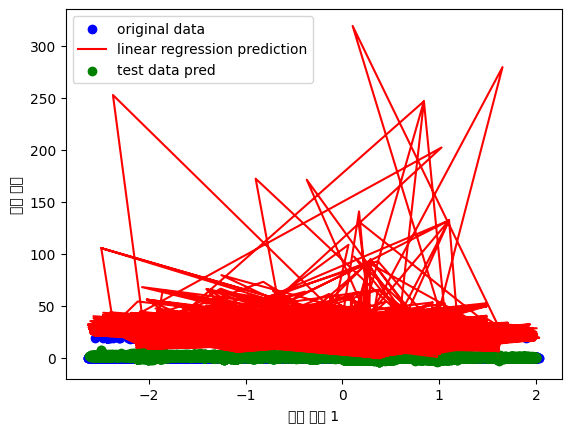

In [105]:
plt.scatter(X.iloc[:, 0], y, color='blue', label='original data')  # 첫 번째 독립 변수와 실제 데이터
plt.plot(X.iloc[:, 0], model.predict(X), color='red', label='linear regression prediction' )  # 첫 번째 독립 변수와 회귀 예측값
plt.scatter(X_test.iloc[:, 0], y_pred, color='green', label='test data pred')  # 테스트 데이터와 예측값
plt.xlabel('독립 변수 1')  # x축 레이블
plt.ylabel('타겟 변수')  # y축 레이블
plt.legend()  # 범례 표시
plt.show()

# 예측값 잘 나오면 선형회귀 진행

In [ ]:
x_2

,frstt_nm,ward_nm,dclr_tm,daywk,dsp_tm,patnt_contact_tm,spt_dist,sido_nm,sigungu_nm,emd_nm,loc_info_x,loc_info_y,spt_dist1,time_unit_tmprt,ADM_CD,TOT_REG_CD,lat,long,dsp_reqre_time
0,전주완산소방서,교동119안전센터,182700,금요일,182700,183500.0,2.0,전라북도,전주시완산구,동서학동,214611.5781,256851.3906,2.0,-3.0,35011600.0,3.501160e+13,35.8112,127.1518,800.0
1,전주완산소방서,교동119안전센터,192700,목요일,192700,193200.0,1.0,전라북도,전주시완산구,동서학동,214331.8906,256869.4844,5.0,-4.1,35011600.0,3.501160e+13,35.8112,127.1518,500.0
2,전주완산소방서,교동119안전센터,220600,금요일,220600,220900.0,2.0,전라북도,전주시완산구,동서학동,214331.8906,256869.4844,2.0,-0.2,35011600.0,3.501160e+13,35.8112,127.1518,300.0
3,전주완산소방서,교동119안전센터,5900,토요일,10200,10500.0,2.0,전라북도,전주시완산구,동서학동,214379.9531,256709.0469,3.0,-1.5,35011600.0,3.501160e+13,35.8112,127.1518,300.0
4,전주완산소방서,교동119안전센터,45000,수요일,45100,45400.0,2.0,전라북도,전주시완산구,동서학동,214457.1875,256820.5000,4.0,-5.7,35011600.0,3.501160e+13,35.8112,127.1518,300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242515,고창소방서,대산119안전센터,221700,수요일,223724,230000.0,21.4,전라북도,고창군,흥덕면,172941.6000,224940.4000,13.0,14.9,35570400.0,3.557040e+13,35.3399,126.5983,6276.0
242517,고창소방서,대산119안전센터,112400,수요일,115058,122700.0,24.4,전라북도,고창군,흥덕면,172034.0700,228093.6000,20.0,-5.4,35570400.0,3.557040e+13,35.3399,126.5983,7642.0
242518,고창소방서,대산119안전센터,112400,수요일,115058,122800.0,24.4,전라북도,고창군,흥덕면,172034.0700,228093.6000,20.0,-5.4,35570400.0,3.557040e+13,35.3399,126.5983,7742.0
242519,고창소방서,대산119안전센터,112400,수요일,115058,122900.0,24.4,전라북도,고창군,흥덕면,172034.0700,228093.6000,20.0,-5.4,35570400.0,3.557040e+13,35.3399,126.5983,7842.0


In [ ]:
len(x_2.columns),x_2.iloc[0,16],x_2.iloc[0,17]

(19, 35.8112, 127.1518)

In [ ]:
x_2.loc[0,'ward_nm']

0    교동119안전센터
0    금암119안전센터
0    노송119안전센터
0    교동119안전센터
Name: ward_nm, dtype: object

In [ ]:
x_2.iloc[:,1]

0         교동119안전센터
1         교동119안전센터
2         교동119안전센터
3         교동119안전센터
4         교동119안전센터
            ...    
242515    대산119안전센터
242517    대산119안전센터
242518    대산119안전센터
242519    대산119안전센터
242522    대산119안전센터
Name: ward_nm, Length: 551111, dtype: object

In [ ]:
dictionary = {}
for i,j,k,y in zip(x_2.iloc[:,1],x_2.iloc[:,16], x_2.iloc[:,17], x.iloc[:,1]):
    if i not in dictionary.keys():
        dictionary[i] = [y,j,k]

In [ ]:
dictionary_2=pd.DataFrame(dictionary).T

In [ ]:
len(set(x.loc[:,'ward_nm']))

47

In [ ]:
x.loc[:,'dsp_reqre_time'] = x.loc[:,'dsp_reqre_time'] / 100
# 정규화

injected_columns = ['frstt_nm','sigungu_nm','emd_nm','time_unit_tmprt','daywk']
label = ['dsp_reqre_time']
drop_col = ['ADM_CD', 'TOT_REG_CD','frstt_nm','sido_nm']

In [ ]:
x

,frstt_nm,ward_nm,dclr_tm,daywk,dsp_tm,patnt_contact_tm,spt_dist,sido_nm,sigungu_nm,emd_nm,loc_info_x,loc_info_y,spt_dist1,time_unit_tmprt,ADM_CD,TOT_REG_CD,lat,long,dsp_reqre_time
0,10,5,182700,0,182700,183500.0,2.0,1,9,79,214611.5781,256851.3906,2.0,-3.0,35011600.0,3.501160e+13,35.8112,127.1518,0.0800
1,10,5,192700,1,192700,193200.0,1.0,1,9,79,214331.8906,256869.4844,5.0,-4.1,35011600.0,3.501160e+13,35.8112,127.1518,0.0500
2,10,5,220600,0,220600,220900.0,2.0,1,9,79,214331.8906,256869.4844,2.0,-0.2,35011600.0,3.501160e+13,35.8112,127.1518,0.0300
3,10,5,5900,5,10200,10500.0,2.0,1,9,79,214379.9531,256709.0469,3.0,-1.5,35011600.0,3.501160e+13,35.8112,127.1518,0.0300
4,10,5,45000,2,45100,45400.0,2.0,1,9,79,214457.1875,256820.5000,4.0,-5.7,35011600.0,3.501160e+13,35.8112,127.1518,0.0300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242515,0,13,221700,2,223724,230000.0,21.4,1,0,350,172941.6000,224940.4000,13.0,14.9,35570400.0,3.557040e+13,35.3399,126.5983,0.6276
242517,0,13,112400,2,115058,122700.0,24.4,1,0,350,172034.0700,228093.6000,20.0,-5.4,35570400.0,3.557040e+13,35.3399,126.5983,0.7642
242518,0,13,112400,2,115058,122800.0,24.4,1,0,350,172034.0700,228093.6000,20.0,-5.4,35570400.0,3.557040e+13,35.3399,126.5983,0.7742
242519,0,13,112400,2,115058,122900.0,24.4,1,0,350,172034.0700,228093.6000,20.0,-5.4,35570400.0,3.557040e+13,35.3399,126.5983,0.7842


In [ ]:
x_3 = x.loc[:,injected_columns]

In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(x_3)
scaled_df = pd.DataFrame(scaled_data, columns = injected_columns)

print(scaled_df)
'''
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Create a sample DataFrame
data = pd.DataFrame({'Feature1': [10, 20, 30, 40, 50],
                     'Feature2': [5, 15, 25, 35, 45]})

# Create an instance of the StandardScaler class
scaler = StandardScaler()

# Standardize the features in the DataFrame
scaled_data = scaler.fit_transform(data)

# Create a new DataFrame with the standardized values
scaled_df = pd.DataFrame(scaled_data, columns=data.columns)

# Print the scaled DataFrame
print(scaled_df)

'''

        frstt_nm  sigungu_nm    emd_nm  time_unit_tmprt     daywk
0       0.971813    1.141085 -0.928228        -1.703874 -1.499704
1       0.971813    1.141085 -0.928228        -1.809612 -0.999691
2       0.971813    1.141085 -0.928228        -1.434723 -1.499704
3       0.971813    1.141085 -0.928228        -1.559686  1.000360
4       0.971813    1.141085 -0.928228        -1.963412 -0.499678
...          ...         ...       ...              ...       ...
551106 -1.655609   -1.616833  1.682477         0.016768 -0.499678
551107 -1.655609   -1.616833  1.682477        -1.934575 -0.499678
551108 -1.655609   -1.616833  1.682477        -1.934575 -0.499678
551109 -1.655609   -1.616833  1.682477        -1.934575 -0.499678
551110 -1.655609   -1.616833  0.064033         0.247468  0.000335

[551111 rows x 5 columns]


"\nimport pandas as pd\nfrom sklearn.preprocessing import StandardScaler\n\n# Create a sample DataFrame\ndata = pd.DataFrame({'Feature1': [10, 20, 30, 40, 50],\n                     'Feature2': [5, 15, 25, 35, 45]})\n\n# Create an instance of the StandardScaler class\nscaler = StandardScaler()\n\n# Standardize the features in the DataFrame\nscaled_data = scaler.fit_transform(data)\n\n# Create a new DataFrame with the standardized values\nscaled_df = pd.DataFrame(scaled_data, columns=data.columns)\n\n# Print the scaled DataFrame\nprint(scaled_df)\n\n"

In [ ]:
x.loc[:,injected_columns] = scaled_df.loc[:,injected_columns]

In [ ]:
x

,frstt_nm,ward_nm,dclr_tm,daywk,dsp_tm,patnt_contact_tm,spt_dist,sido_nm,sigungu_nm,emd_nm,loc_info_x,loc_info_y,spt_dist1,time_unit_tmprt,ADM_CD,TOT_REG_CD,lat,long,dsp_reqre_time
0,0.971813,5,182700,-1.499704,182700,183500.0,2.0,1,1.141085,-0.928228,214611.5781,256851.3906,2.0,-1.703874,35011600.0,3.501160e+13,35.8112,127.1518,0.0800
1,0.971813,5,192700,-0.999691,192700,193200.0,1.0,1,1.141085,-0.928228,214331.8906,256869.4844,5.0,-1.809612,35011600.0,3.501160e+13,35.8112,127.1518,0.0500
2,0.971813,5,220600,-1.499704,220600,220900.0,2.0,1,1.141085,-0.928228,214331.8906,256869.4844,2.0,-1.434723,35011600.0,3.501160e+13,35.8112,127.1518,0.0300
3,0.971813,5,5900,1.000360,10200,10500.0,2.0,1,1.141085,-0.928228,214379.9531,256709.0469,3.0,-1.559686,35011600.0,3.501160e+13,35.8112,127.1518,0.0300
4,0.971813,5,45000,-0.499678,45100,45400.0,2.0,1,1.141085,-0.928228,214457.1875,256820.5000,4.0,-1.963412,35011600.0,3.501160e+13,35.8112,127.1518,0.0300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242515,0.971813,13,221700,1.000360,223724,230000.0,21.4,1,1.141085,1.393469,172941.6000,224940.4000,13.0,0.795382,35570400.0,3.557040e+13,35.3399,126.5983,0.6276
242517,0.971813,13,112400,-1.499704,115058,122700.0,24.4,1,1.141085,1.393469,172034.0700,228093.6000,20.0,1.285621,35570400.0,3.557040e+13,35.3399,126.5983,0.7642
242518,0.971813,13,112400,1.500373,115058,122800.0,24.4,1,1.141085,1.393469,172034.0700,228093.6000,20.0,0.920345,35570400.0,3.557040e+13,35.3399,126.5983,0.7742
242519,0.971813,13,112400,0.000335,115058,122900.0,24.4,1,1.141085,1.393469,172034.0700,228093.6000,20.0,1.218333,35570400.0,3.557040e+13,35.3399,126.5983,0.7842


In [ ]:
x.to_csv('/content/drive/MyDrive/Colab Notebooks/소방인력 예측/dataSet/really_end2.csv',index=True,encoding='EUC-KR')

dictionary_2.to_csv('/content/drive/MyDrive/Colab Notebooks/소방인력 예측/dataSet/dictionary_2.csv',index=True,encoding='EUC-KR')

In [ ]:
emg_list[0].to_csv('./emg_data/emg11_12.csv',index=True,encoding='EUC-KR')

emg_list[1].to_csv('./emg_data/emg13_14.csv',index=True,encoding='EUC-KR')

emg_list[2].to_csv('./emg_data/emg15_16.csv',index=True,encoding='EUC-KR')

emg_list[3].to_csv('./emg_data/emg17_18.csv',index=True,encoding='EUC-KR')

emg_list[4].to_csv('./emg_data/emg19_20.csv',index=True,encoding='EUC-KR')
